# Applying Random Forest Classifier to Sonar Dataset

### Jun 19 2019

1.First reduce the columns into Principal component by applying the PCA to the given dataset
2.Second applied the Random Forest Classifier to the Sonar Dataset.
3.Finding the accuracy

In [1]:
# Loading the dependencies
import pandas as pd
import numpy as np
import sklearn

In [2]:
# Loading the dataset
sonar = pd.read_csv("E:/Data Scientist/Datasets/sonar.all-data.csv", header= None)

In [3]:
print(sonar.head())
print(sonar.shape)

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9  ...      51      52      53      54      55      56      57      58  \
0  0.2111 ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  0.0090   
1  0.2872 ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049  0.0052   
2  0.6194 ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164  0.0095   
3  0.1264 ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044  0.0040   
4  0.4459 ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048  0.0107   

       59  60  
0  0.0032   R  
1  0.0044   R  
2 

From the dataset as we see there are 60 feature columns. This have too many feature for to class whether the sonar chrip is a Metal or rock. To deal with this feature columns I reduce the feature column using  dimensional reduction later find the column which have high and accuracy to use for the random forest algorithm.

In [4]:
# Loading the dependencies for the dimensional reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import sklearn as sk

In [7]:
# Considering the all columns except the label columns
sonar1 = sonar.iloc[:,0:60]
sonar1.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [8]:
# Check for any null values in the dataset
print(sonar1.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
dtype: int64


In [9]:
# Check for the first statistics
sonar1.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [10]:
# Normalizing the dataset
sonar1_norm = scale(sonar1) 
type(sonar1_norm)

numpy.ndarray

In [13]:
sonar1_norm = pd.DataFrame(sonar1_norm)
sonar1_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,...,0.595283,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,...,-0.297902,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,...,-1.065875,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,...,0.670411,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,...,-0.039129,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375


In [18]:
# Applying the dimensional reduction to the dataset
pca = PCA()
sonar_pca = pca.fit_transform(sonar1_norm)
type(sonar_pca)
len(sonar_pca)

208

In [15]:
# Variance of the feature columns
pca_var = pca.explained_variance_ratio_

In [19]:
# Components of the pca
(pca.components_)
sonar_pccomp = pd.DataFrame(sonar_pca)
sonar_pccomp.head()

(208, 60)

In [20]:
cumvar = np.cumsum(np.round(pca_var,decimals=4)*100)
cumvar

array([ 20.35,  39.25,  47.8 ,  53.48,  58.49,  62.55,  65.83,  68.88,
        71.45,  73.94,  76.02,  77.92,  79.67,  81.21,  82.64,  84.  ,
        85.23,  86.4 ,  87.43,  88.41,  89.35,  90.24,  91.08,  91.85,
        92.57,  93.27,  93.89,  94.42,  94.94,  95.44,  95.92,  96.36,
        96.73,  97.07,  97.38,  97.68,  97.97,  98.21,  98.43,  98.64,
        98.82,  98.98,  99.12,  99.25,  99.35,  99.44,  99.53,  99.6 ,
        99.66,  99.71,  99.76,  99.81,  99.85,  99.89,  99.92,  99.95,
        99.97,  99.99, 100.01, 100.02])

In [21]:
import matplotlib.pyplot as plt

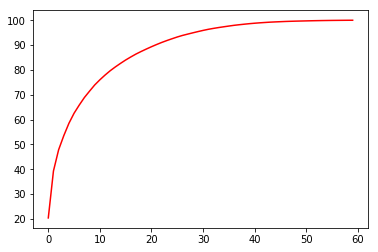

In [47]:
plt.plot(cumvar,color="red")
plt.show()

In [23]:
# from the above plot we consider 94% cum_var level for this algorithm 
# now taking the 25 feature principal component for the analysis
new_sonar = sonar_pccomp.iloc[:,0:25]
new_sonar.head()
new_sonar.shape

(208, 25)

In [24]:
# Now adding the label part to the new dataframe
new_sonar[25]= sonar.iloc[:,-1]

c:\users\gudis\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
new_sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.921168,-1.370893,-1.666476,0.837913,-1.057324,1.712504,1.785716,-1.581264,0.335418,-1.028065,...,1.384272,2.623221,0.008724,0.866819,-1.208238,0.723202,0.304876,0.120470,-0.458567,R
1,-0.480125,7.586388,-1.275734,3.859346,2.121112,-2.186818,-1.742764,1.517061,0.307933,-1.341882,...,-0.171371,1.403636,0.264560,-0.048882,-2.388110,0.021429,-0.145524,-0.246021,0.117770,R
2,3.859228,6.439860,-0.030635,5.454599,1.552060,1.181619,-1.820138,-1.495929,-1.152459,-1.006030,...,-1.024685,0.826105,0.468705,-1.841670,-1.740823,-2.000942,-0.295682,1.931963,0.758036,R
3,4.597419,-3.104089,-1.785344,-1.115908,-2.785528,-2.072673,2.084530,1.707289,0.452390,-1.117318,...,-0.496407,-2.464503,1.878381,-0.999830,-0.685825,1.307367,-0.662918,1.142591,-0.352601,R
4,-0.533868,1.849847,-0.860097,3.302076,2.808954,-0.783945,0.362657,0.812621,0.184578,-0.023594,...,-0.707854,-0.414109,-0.632443,-0.976459,0.503340,0.258970,0.253982,1.199262,-0.165722,R


In [28]:
# now labelling the last feature column to 1 or 0
new_sonar[25] = new_sonar[25].map({'M':1,'R':0})

c:\users\gudis\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
new_sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.921168,-1.370893,-1.666476,0.837913,-1.057324,1.712504,1.785716,-1.581264,0.335418,-1.028065,...,1.384272,2.623221,0.008724,0.866819,-1.208238,0.723202,0.304876,0.120470,-0.458567,0
1,-0.480125,7.586388,-1.275734,3.859346,2.121112,-2.186818,-1.742764,1.517061,0.307933,-1.341882,...,-0.171371,1.403636,0.264560,-0.048882,-2.388110,0.021429,-0.145524,-0.246021,0.117770,0
2,3.859228,6.439860,-0.030635,5.454599,1.552060,1.181619,-1.820138,-1.495929,-1.152459,-1.006030,...,-1.024685,0.826105,0.468705,-1.841670,-1.740823,-2.000942,-0.295682,1.931963,0.758036,0
3,4.597419,-3.104089,-1.785344,-1.115908,-2.785528,-2.072673,2.084530,1.707289,0.452390,-1.117318,...,-0.496407,-2.464503,1.878381,-0.999830,-0.685825,1.307367,-0.662918,1.142591,-0.352601,0
4,-0.533868,1.849847,-0.860097,3.302076,2.808954,-0.783945,0.362657,0.812621,0.184578,-0.023594,...,-0.707854,-0.414109,-0.632443,-0.976459,0.503340,0.258970,0.253982,1.199262,-0.165722,0


In [35]:
# Now we split the dataset into training and test dataset
from sklearn.model_selection import train_test_split
X = new_sonar.iloc[:,0:25]
y = new_sonar.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.33, random_state =1)
print("X training set :", X_train.shape[0])
print("y training set:", y_train.shape[0])
print("X test set :", X_test.shape[0])
print("y test set:",y_test.shape[0])

X training set : 139
y training set: 139
X test set : 69
y test set: 69


In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = int(np.sqrt(len(X))))
# Now fit the classifier to the training set
classifier.fit(X_train,y_train)
# Predict the classifier for the test set
predict = classifier.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
print("Accuracy :", accuracy_score(predict,y_test))

Accuracy : 0.7681159420289855
